In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load dataset
df=pd.read_csv("diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploratory Data Analysis


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.shape

(768, 9)

In [11]:
df.info() # finding out if the dataset contains any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.columns # feature of the given dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
for col in df.columns:
    print(col)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [13]:
df.sample(10) # random number of records of data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
503,7,94,64,25,79,33.3,0.738,41,0
553,1,88,62,24,44,29.9,0.422,23,0
284,2,108,80,0,0,27.0,0.259,52,1
264,4,123,62,0,0,32.0,0.226,35,1
757,0,123,72,0,0,36.3,0.258,52,1
707,2,127,46,21,335,34.4,0.176,22,0
690,8,107,80,0,0,24.6,0.856,34,0
687,1,107,50,19,0,28.3,0.181,29,0
243,6,119,50,22,176,27.1,1.318,33,1
331,2,87,58,16,52,32.7,0.166,25,0


In [15]:

df.dtypes # list the types of all columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
# statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Interpretation:- 
in the above table,the min value of columns[Glucose,BloodPressure,SkinThickness,Insulin,BMI] is zero(0), it is clear that values can not be zero
so, replacing the  respective values with mean values

In [39]:
# DATA Cleaning
df.shape

(768, 9)

In [27]:
df1=df.duplicated()

In [28]:
df1.head(4)

0    False
1    False
2    False
3    False
dtype: bool

In [30]:
for i in df1: #checking the duplicate values in the data frame 
    if i=='True':
        print(i)
    else:
        print("False")

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [21]:
df=df.drop_duplicates() # if duplicated rows exist- we sholud remove from data frame

In [22]:
df.shape

(768, 9)

In [31]:
## check the null values
df.isnull().sum() # 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:


[features for features in df.columns if df[features].isnull().sum()>0] 

[]

In [35]:
df[df.Glucose.isnull()] # checking the null values for specific feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot:>

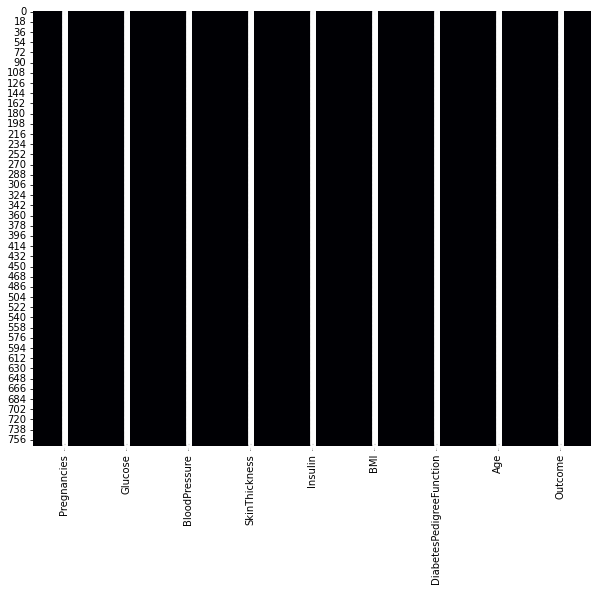

In [41]:
import matplotlib # checking the null values with the help of heatmap
plt.matplotlib.rcParams['figure.figsize']=(10,8)
sns.heatmap(df.isnull(),cbar=False,annot=True,fmt='.2g',cmap='magma',)

<AxesSubplot:xlabel='Outcome'>

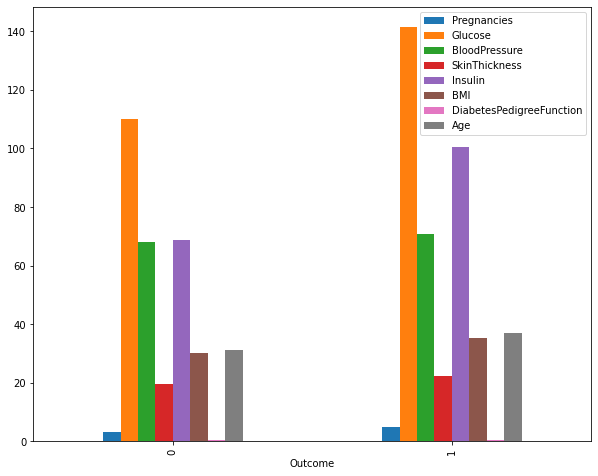

In [57]:
df.groupby("Outcome").mean().plot(kind='bar')

## Data Visualization 

Negative(0): 500
Positve(1): 268


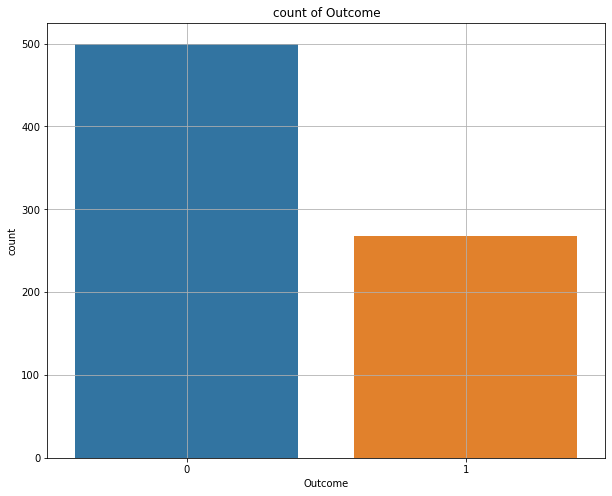

In [46]:
#Countplot- to show the count of observations in target feature-'Outcome'
sns.countplot('Outcome',data=df)
plt.grid()
plt.title("count of Outcome")
N,P=df['Outcome'].value_counts()
print('Negative(0):',N)
print('Positve(1):',P)

##Interpretation- 
out of 768 people, 268 diabetic(poistive(1)) and 500 are non-diabetic(Negative(0))

<AxesSubplot:>

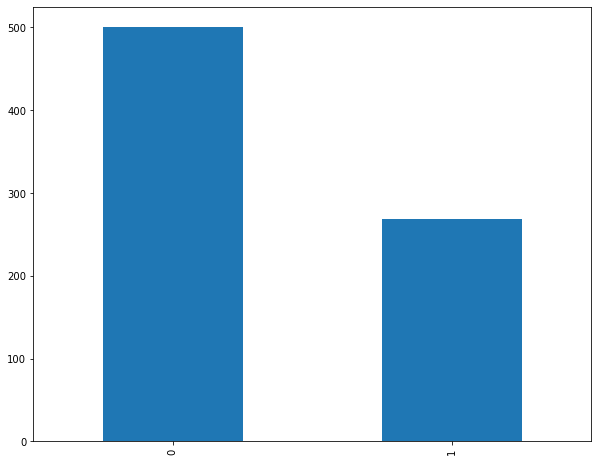

In [58]:
df['Outcome'].value_counts().sort_values(ascending=False).plot(kind='bar')

## Histograms
Histograms are one of the most commomn graphs used to disply the numerical data.

distribution of data- whether the data is normally distributed or if it's skewed(to the left or right)

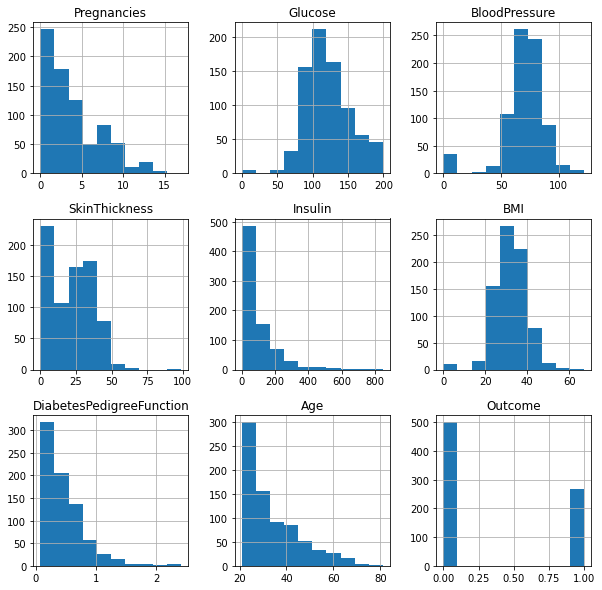

In [63]:
#histogram of each feature
df.hist(bins=10,figsize=(10,10))
   plt.show()

## Scatter plot

is used to derive quike understand between two variables

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', 

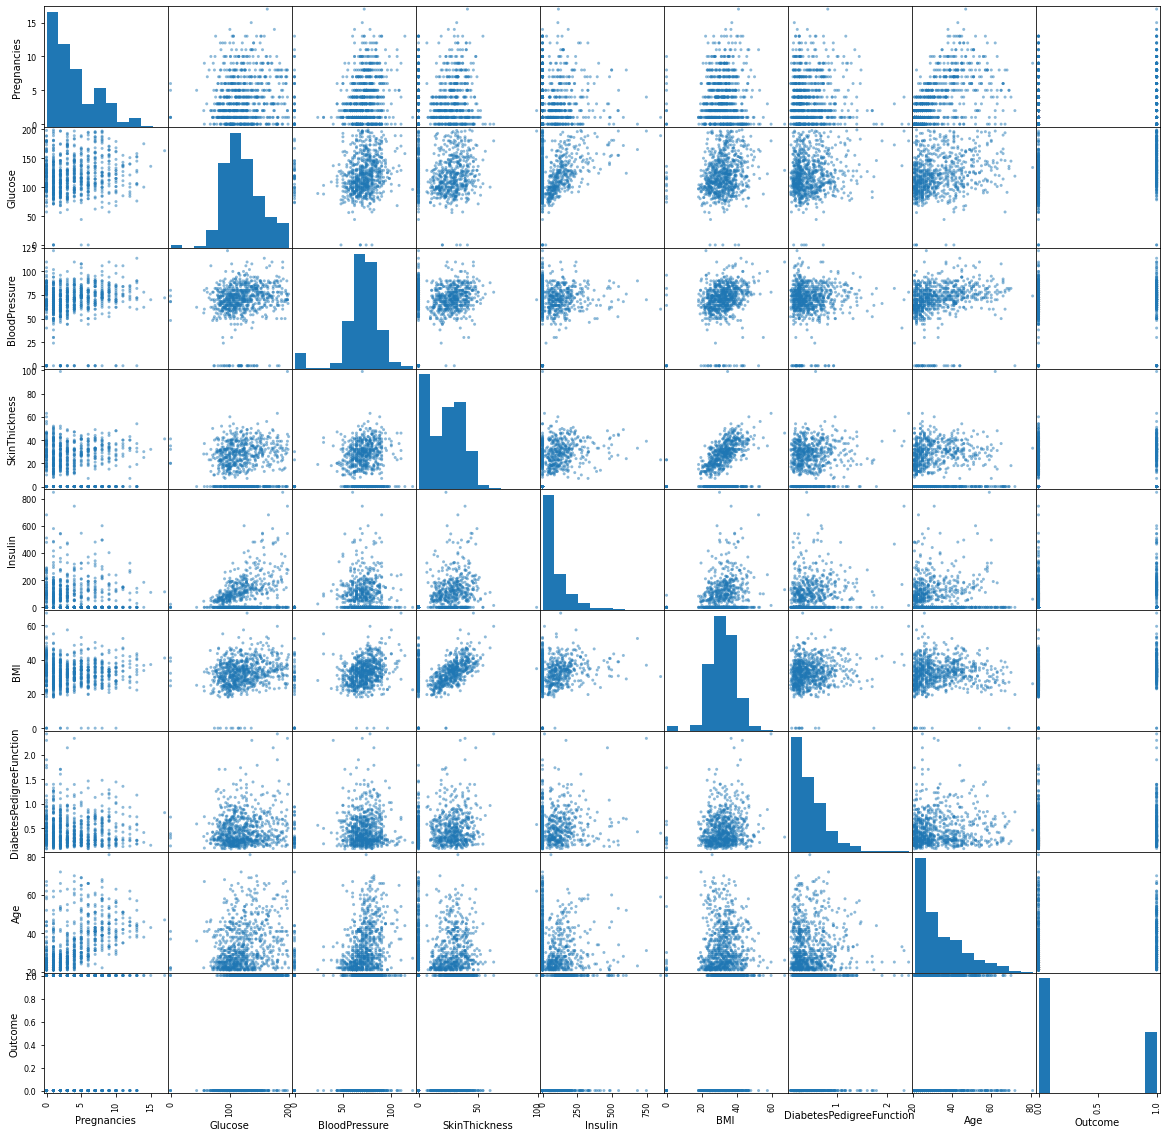

In [65]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))

In [ ]:
## Pairplot

sns.pairplot() is a greatway to create scatter bettwen all of your variables

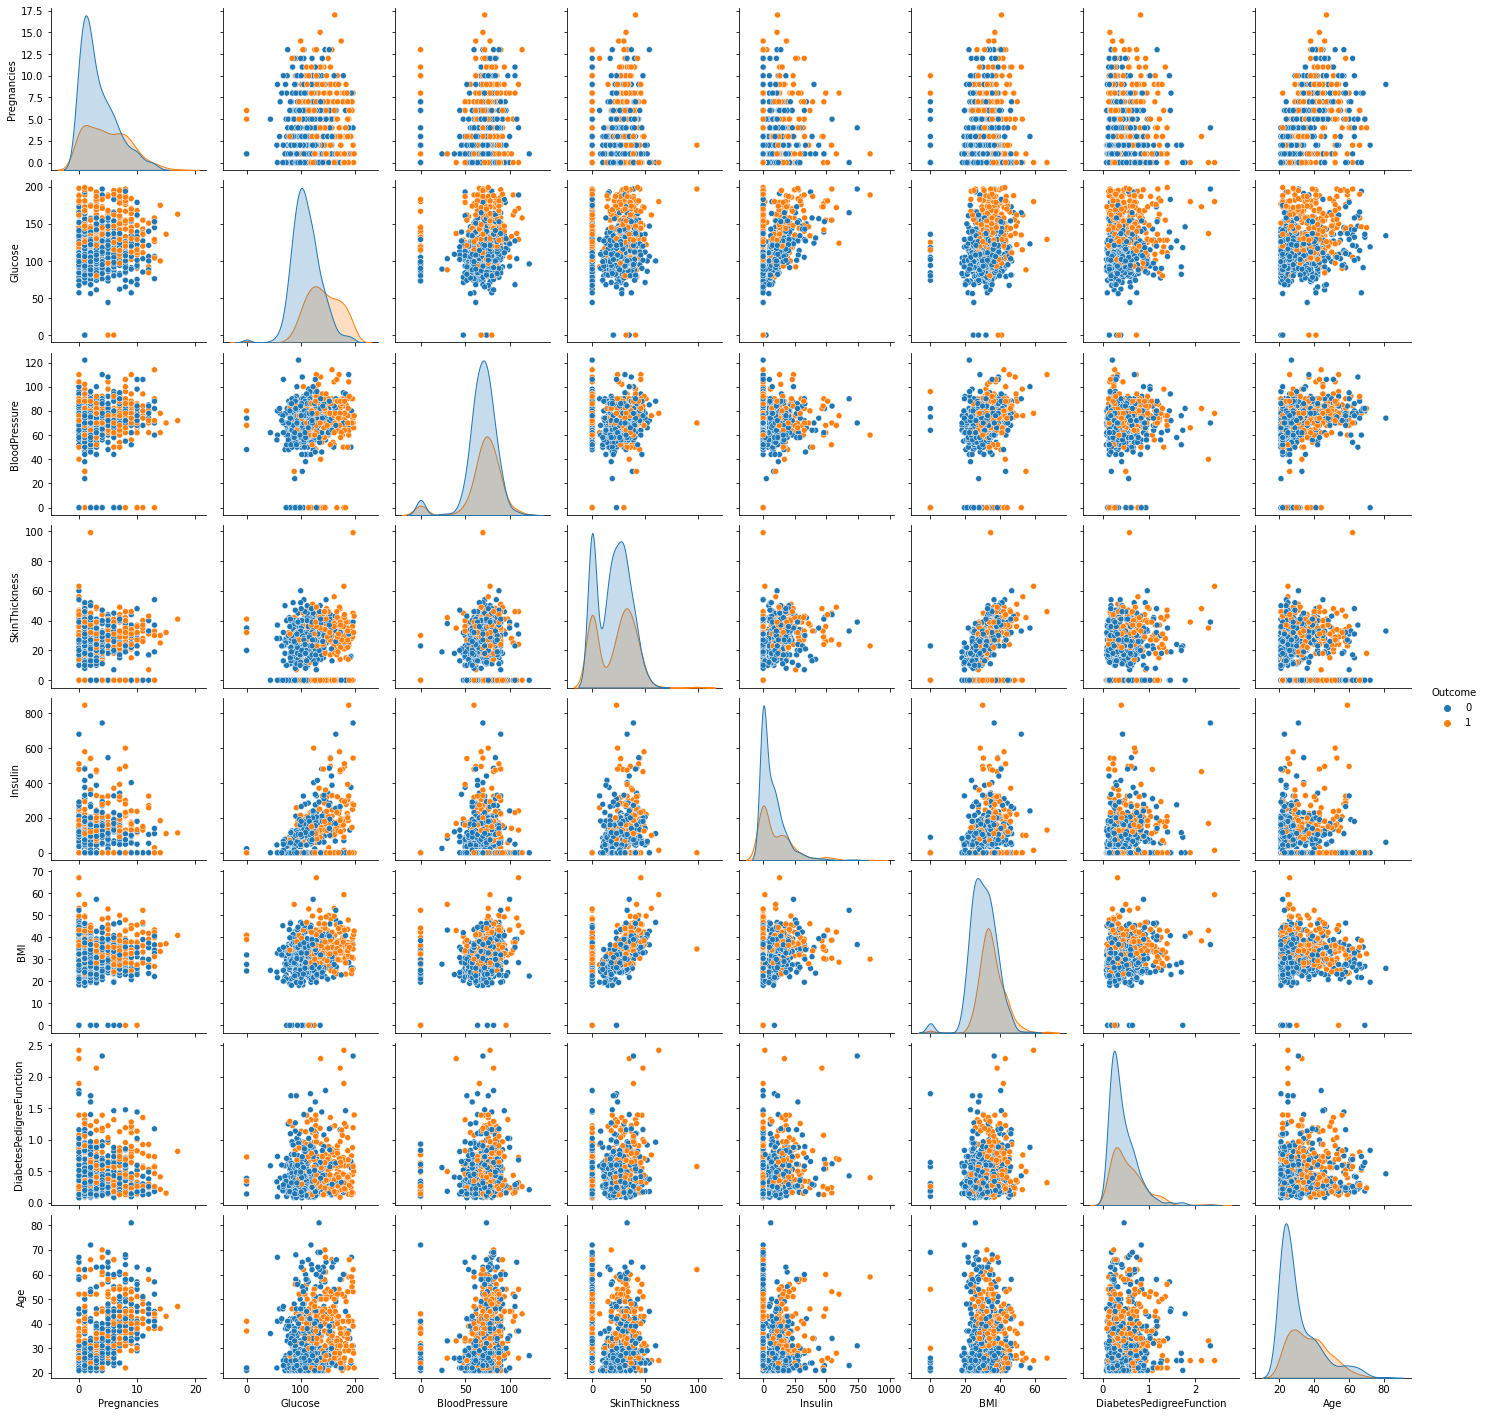

In [66]:

sns.pairplot(data=df,hue='Outcome')

In [78]:
## Analyzing the relationship between variables- # CORRELATION
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

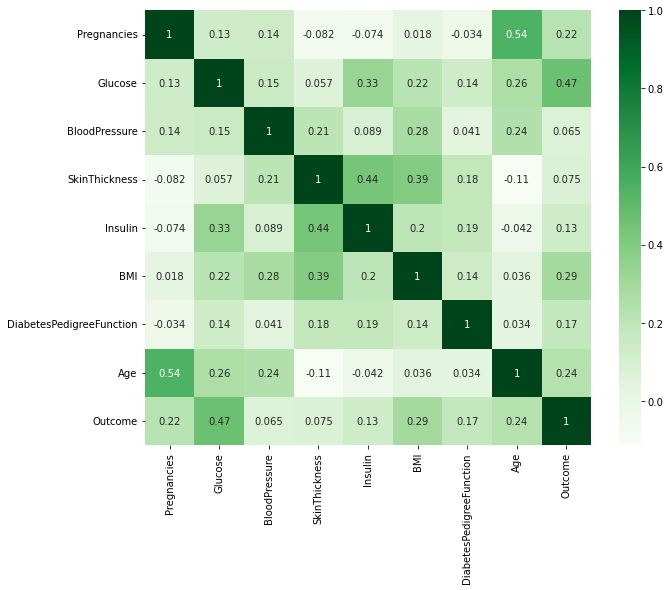

In [76]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

##  Observations:-
from the above,we can see high correlation between Outcome and [Pregnancies,Glucose,BMI,AGE,Insulin].we can select
these features to accept input from the user and predict the outcome


## Split the dataframe into X and y

In [81]:
tar_fea='Outcome'
y=df[tar_fea]
X=df.drop(tar_fea,axis=1)

In [84]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [85]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Apply Feature Scaling


In [86]:
##Apply Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [100]:
sc.fit(X)

StandardScaler()

In [103]:
st_scal=sc.transform(X)

In [105]:
pd.DataFrame(st_scal,columns=X.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [160]:
## Train_Test_Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(st_scal,y,test_size=0.2,random_state=0)

In [161]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [ ]:
## Build the Classification Algorithms

# 1.Logistic Regression

In [109]:

from sklearn.linear_model import LogisticRegression
log=LogisticRegression(solver='liblinear',multi_class='ovr')
log.fit(X_train,y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [167]:
#model evalution-making prediction on X_test
log_pred=log.predict(X_test)

In [168]:
log.score(X_train,y_train) # train score

0.7703583061889251

In [169]:
log.score(X_test,y_test) # test score

0.8311688311688312

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
print("accuracy is :", accuracy_score(y_test,log_pred))

accuracy is : 0.8311688311688312


In [173]:
from sklearn.metrics import confusion_matrix,classification_report

In [174]:
cm=confusion_matrix(y_test,log_pred)

In [175]:
cm

array([[99,  8],
       [18, 29]], dtype=int64)

<AxesSubplot:>

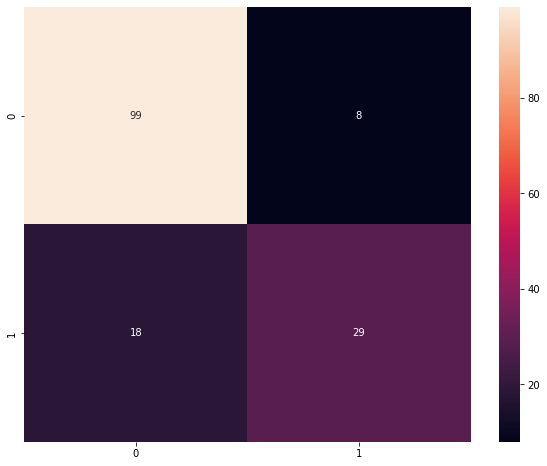

In [176]:
sns.heatmap(cm,annot=True,fmt='.2g') # heatmap for confusion matrix

In [177]:
#classification_report

print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.78      0.62      0.69        47

    accuracy                           0.83       154
   macro avg       0.81      0.77      0.79       154
weighted avg       0.83      0.83      0.82       154



# 2.Kneighbors Classifier

In [185]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [186]:
y_pred=knn.predict(X_test)

In [187]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [188]:
print("train_score:",knn.score(X_train,y_train)) # train score
print("testscore:",knn.score(X_test,y_test)) # test score
print("accuracy is :", accuracy_score(y_test,y_pred))


train_score: 0.7801302931596091
testscore: 0.8051948051948052
accuracy is : 0.8051948051948052


## confusion_matrix

In [189]:
knn_con=C

In [191]:
knn_con

array([[97, 10],
       [20, 27]], dtype=int64)

<AxesSubplot:>

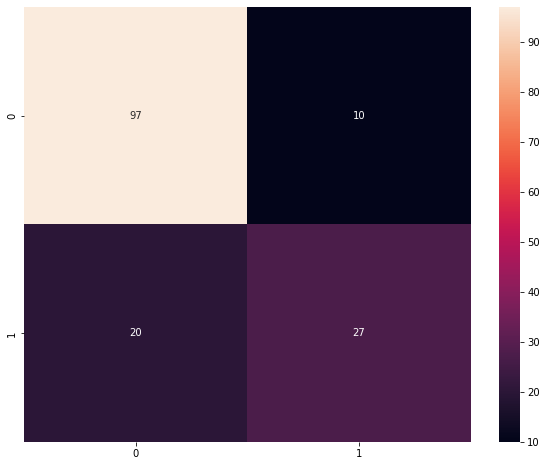

In [192]:
sns.heatmap(knn_con,annot=True,fmt='.2g') # heatmap for confusion matrix

In [193]:
#classification_report-KNN 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



# 3.Support Vector Machine

In [120]:
#supportvector machine
from sklearn.svm import SVC
sv=SVC(C=1.0,kernel='rbf',gamma='auto')
sv.fit(X_train,y_train)

SVC(gamma='auto')

In [202]:
#model evalution-making prediction on X_test
y_pred=sv.predict(X_test)

In [203]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [210]:
print("train_score:",sv.score(X_train,y_train)) # train score
print("test_score:",sv.score(X_test,y_test)) # test score
print("accuracy is :", accuracy_score(y_test,y_pred))


train_score: 0.8045602605863192
test_score: 0.8441558441558441
accuracy is : 0.8441558441558441


## confusion_matrix

In [205]:

sv_con=confusion_matrix(y_test,y_pred)

In [207]:
sv_con

array([[100,   7],
       [ 17,  30]], dtype=int64)

<AxesSubplot:>

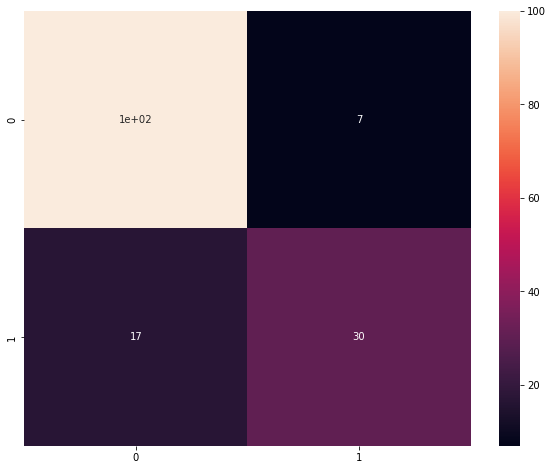

In [208]:
sns.heatmap(sv_con,annot=True,fmt='.2g')

In [209]:
#classification_report-svm

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       107
           1       0.81      0.64      0.71        47

    accuracy                           0.84       154
   macro avg       0.83      0.79      0.80       154
weighted avg       0.84      0.84      0.84       154



# 4.Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='gini')
rf.fit(X_train,y_train)

RandomForestClassifier()

In [201]:
#model evalution-making prediction on X_test
y_pred=rf.predict(X_test)

In [212]:
print("train_score:",sv.score(X_train,y_train)) # train score
print("testscore:",sv.score(X_test,y_test)) # test score
print("accuracy is :", accuracy_score(y_test,y_pred))


train_score: 0.8045602605863192
testscore: 0.8441558441558441
accuracy is : 0.8441558441558441


In [225]:
## confusion_matrix

In [213]:

rf_con=confusion_matrix(y_test,y_pred)

In [214]:
rf_con

array([[100,   7],
       [ 17,  30]], dtype=int64)

<AxesSubplot:>

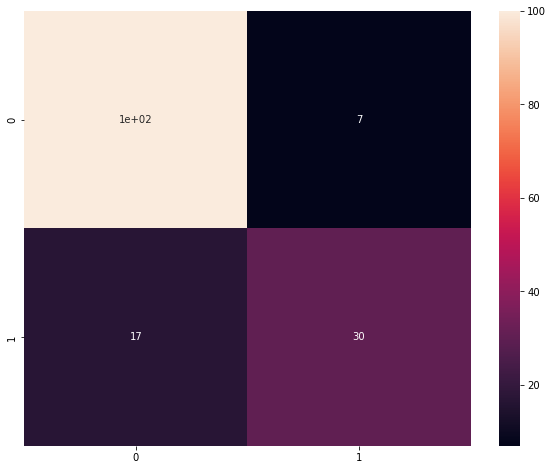

In [215]:
#heatmap for confusion_matrix
sns.heatmap(rf_con,annot=True,fmt='.2g')

In [216]:

#classification_report-rf

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       107
           1       0.81      0.64      0.71        47

    accuracy                           0.84       154
   macro avg       0.83      0.79      0.80       154
weighted avg       0.84      0.84      0.84       154



# 5.XGBOOST

In [118]:
from xgboost import  XGBClassifier
xgb=XGBClassifier(n_estimators=100,eta=0.01,gamma=5)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric=None, gamma=5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [218]:
y_pred=xgb.predict(X_test)

In [219]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [220]:
print("Train_score:",xgb.score(X_train,y_train)) # train score
print("testscore:",xgb.score(X_test,y_test)) # test score
print("accuracy is :", accuracy_score(y_test,y_pred))


Train_score: 0.8224755700325733
testscore: 0.8571428571428571
accuracy is : 0.8571428571428571


In [ ]:
#confusion_matrix

In [221]:
xg_con=confusion_matrix(y_test,y_pred)

In [222]:
xg_con

array([[99,  8],
       [14, 33]], dtype=int64)

<AxesSubplot:>

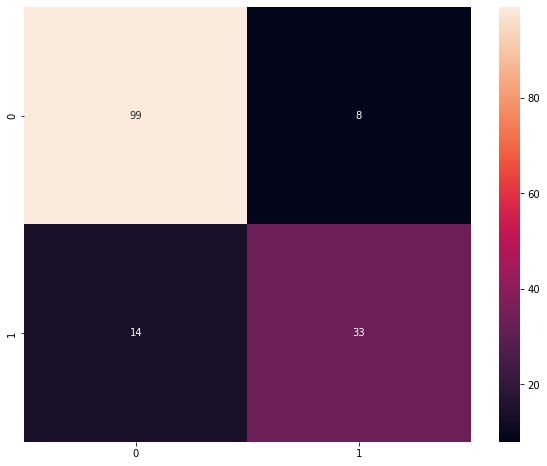

In [223]:
#heatmap for confusion_matrix
sns.heatmap(xg_con,annot=True,fmt='.2g')

In [224]:

#classification_report-xgboost

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.80      0.70      0.75        47

    accuracy                           0.86       154
   macro avg       0.84      0.81      0.83       154
weighted avg       0.85      0.86      0.85       154

